# Differing Water Quality in Protected and Unprotected U.S. Southwest

River Basins

Samantha Nauman, Madison Schartz, Hanna Velicer (Colorado State University)

# Drafting the Introduction, Background, and Motivation for the Project

BLAH

# Exploring the Data

In [ ]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Attaching package: 'plotly'

The following object is masked from 'package:ggplot2':

    last_plot

The following object is masked from 'package:stats':

    filter

The following object is masked from 'package:graphics':

    layout

Registered S3 method overwritten by 'tsibble':
  method               from 
  as_tibble.grouped_df dplyr

Attaching package: 'tsibble'

The following object is masked from 'package:lubridate':

    interval

The following objects are masked from 'package:base':

    intersect, setdiff, union

ℹ In argument: `across(c(Temp..max., Temp..min., pH..max., pH..min.),
  ~as.numeric(.))`.
Caused by warning:
! NAs introduced by coercion

ℹ In argument: `across(c(Temp..max., Temp..min.), ~as.numeric(.))`.
Caused by warning:
! NAs introduced by coercion

ℹ In argument: `across(...)`.
Caused by warning:
! NAs introduced by coercion

In [ ]:
head(COdata_unprotected1)

# A tibble: 6 × 5
  site_no      Date  Flow `Temp (C)` `pH (mean)`
  <chr>       <mth> <dbl>      <dbl>       <dbl>
1 09034250 1981 Oct  59.9         NA          NA
2 09034250 1981 Nov  76.5         NA          NA
3 09034250 1981 Dec  64.3         NA          NA
4 09034250 1982 Jan  65.5         NA          NA
5 09034250 1982 Feb  63.5         NA          NA
6 09034250 1982 Mar  84.6         NA          NA

# A tibble: 6 × 4
  site_no      Date  Flow `Temp (C)`
  <chr>       <mth> <dbl>      <dbl>
1 09147500 1975 Oct  81.6         NA
2 09147500 1975 Nov 118.          NA
3 09147500 1975 Dec 110.          NA
4 09147500 1976 Jan  72.3         NA
5 09147500 1976 Feb  81.4         NA
6 09147500 1976 Mar  90.6         NA

# A tibble: 6 × 4
  site_no      Date  Flow `Temp (C)`
  <chr>       <mth> <dbl>      <dbl>
1 11074000 1975 Oct  86.4      18.3 
2 11074000 1975 Nov 176.       12.7 
3 11074000 1975 Dec 278.       10.3 
4 11074000 1976 Jan 293.        9.62
5 11074000 1976 Feb 241.       12.9 
6 11074000 1976 Mar 234.       13.4 

# A tibble: 6 × 5
  site_no     Date   Flow `Temp (C)` `pH (mean)`
    <int>    <mth>  <dbl>      <dbl>       <dbl>
1 9315000 1975 Apr  4973.        NaN         NaN
2 9315000 1975 May 10606.        NaN         NaN
3 9315000 1975 Jun 21057.        NaN         NaN
4 9315000 1975 Jul 14614.        NaN         NaN
5 9315000 1975 Aug  5173.        NaN         NaN
6 9315000 1975 Sep  2872         NaN         NaN

In [ ]:
  # CO protected 1
QCO_pro1=readNWISdv(
  siteNumber= c('06752260'),
  parameterCd= c('00060'),
  startDate='1975-10-01', #beginning of wateryear 1976
  endDate='2024-10-01') %>%
  renameNWISColumns() %>%
  mutate(Date = yearmonth(Date)) %>%
  group_by(site_no, Date) %>%
  summarise(Flow = mean(Flow, na.rm = TRUE), .groups = "drop")

pHWT_COpro1 <- read.csv(
  "https://raw.githubusercontent.com/snauman4/ESS330_FinalProject/main/CO_dataprotected1.csv",
  stringsAsFactors = FALSE
)

DailypW_COpro1 <- pHWT_COpro1 %>%
  mutate(Date = mdy(Date)) %>%
  mutate(across(
    c(Temp..max., Temp..min.),
    ~ as.numeric(.))) %>%
  mutate(
    Temp_mean = rowMeans(select(., Temp..max., Temp..min.), na.rm = TRUE),
    pH_mean = rowMeans(select(., pH..max., pH..min.), na.rm = TRUE)) %>%
  group_by(site_no, Date) %>%
  summarise(
    `Temp (C)`  = mean(Temp_mean, na.rm = TRUE),
    `pH (mean)` = mean(pH_mean, na.rm = TRUE),
    .groups = "drop")

Month_COpro1 <- DailypW_COpro1 %>%
  mutate(
    Date = yearmonth(Date)) %>%
  group_by(site_no, Date) %>%
  summarise(
    `Temp (C)`  = mean(`Temp (C)`,  na.rm = TRUE),
    `pH (mean)` = mean(`pH (mean)`, na.rm = TRUE),
    .groups = "drop")

QCO_pro1 <- QCO_pro1 %>%
  mutate(
    site_no = as.character(site_no),        
    Date    = yearmonth(Date))

Month_COpro1 <- Month_COpro1 %>%
  mutate(
    site_no = str_pad(as.character(site_no), width = 8, pad = "0"),
    Date    = yearmonth(Date))

COdata_protected1 <- QCO_pro1 %>%
  left_join(Month_COpro1, by = c("site_no","Date")) %>%
  select(site_no, Date, Flow, `Temp (C)`, `pH (mean)`)

  # CO protected 2
QCO_pro2=readNWISdv(
  siteNumber= c('09163500'),
  parameterCd= c('00060'),
  startDate='1975-10-01', #beginning of wateryear 1976
  endDate='2024-10-01') %>%
  renameNWISColumns() %>%
  mutate(Date = yearmonth(Date)) %>%
  group_by(site_no, Date) %>%
  summarise(Flow = mean(Flow, na.rm = TRUE), .groups = "drop")

pHWT_COpro2 <- read.csv(
  "https://raw.githubusercontent.com/snauman4/ESS330_FinalProject/main/CO_dataprotected2.csv",
  stringsAsFactors = FALSE
)

DailypW_COpro2 <- pHWT_COpro2 %>%
  mutate(Date = mdy(Date)) %>%
  mutate(across(
    c(Temp..max., Temp..min.),
    ~ as.numeric(.))) %>%
  mutate(
    Temp_mean = rowMeans(select(., Temp..max., Temp..min.), na.rm = TRUE),
    pH_mean = rowMeans(select(., pH..max., pH..min.), na.rm = TRUE)) %>%
  group_by(site_no, Date) %>%
  summarise(
    `Temp (C)`  = mean(Temp_mean, na.rm = TRUE),
    `pH (mean)` = mean(pH_mean, na.rm = TRUE),
    .groups = "drop")

Month_COpro2 <- DailypW_COpro2 %>%
  mutate(
    Date = yearmonth(Date)) %>%
  group_by(site_no, Date) %>%
  summarise(
    `Temp (C)`  = mean(`Temp (C)`,  na.rm = TRUE),
    `pH (mean)` = mean(`pH (mean)`, na.rm = TRUE),
    .groups = "drop")

QCO_pro2 <- QCO_pro2 %>%
  mutate(
    site_no = as.character(site_no),       
    Date    = yearmonth(Date))

Month_COpro2 <- Month_COpro2 %>%
  mutate(
    site_no = str_pad(as.character(site_no), width = 8, pad = "0"),
    Date    = yearmonth(Date))

COdata_protected2 <- QCO_pro2 %>%
  left_join(Month_COpro2, by = c("site_no","Date")) %>%
  select(site_no, Date, Flow, `Temp (C)`, `pH (mean)`)

  # CA protected
QCA_pro=readNWISdv(
  siteNumber= c('11044000'),
  parameterCd= c('00060'),
  startDate='1975-10-01', #beginning of wateryear 1976
  endDate='2024-10-01') %>%
  renameNWISColumns() %>%
  mutate(Date = yearmonth(Date)) %>%
  group_by(site_no, Date) %>%
  summarise(Flow = mean(Flow, na.rm = TRUE), .groups = "drop")

pHWT_CApro <- read.csv(
  "https://raw.githubusercontent.com/snauman4/ESS330_FinalProject/main/CA_dataprotected.csv",
  stringsAsFactors = FALSE
)

DailypW_CApro <- pHWT_CApro %>%
  mutate(Date = mdy(Date)) %>%
  mutate(across(
    c(Temp..max., Temp..min.,`pH..max.`, `pH..min.`),
    ~ as.numeric(.),
    .names = "{.col}")
  ) %>%
  mutate(
    Temp_mean = rowMeans(select(., Temp..max., Temp..min.), na.rm = TRUE),
    pH_mean   = rowMeans(select(., pH..max.,    pH..min.),    na.rm = TRUE)
  ) %>%
  group_by(site_no, Date) %>%
  summarise(
    `Temp (C)`  = mean(Temp_mean, na.rm = TRUE),
    `pH (mean)` = mean(pH_mean, na.rm = TRUE),
    .groups = "drop"
  )

The first warning was:
ℹ In argument: `across(...)`.
Caused by warning:
! NAs introduced by coercion
ℹ Run `dplyr::last_dplyr_warnings()` to see the 1 remaining warning.

In [ ]:
head(COdata_protected1)

# A tibble: 6 × 5
  site_no      Date  Flow `Temp (C)` `pH (mean)`
  <chr>       <mth> <dbl>      <dbl>       <dbl>
1 06752260 1975 Oct  7.23         NA          NA
2 06752260 1975 Nov  4.47         NA          NA
3 06752260 1975 Dec  4.09         NA          NA
4 06752260 1976 Jan  3.46         NA          NA
5 06752260 1976 Feb  3.51         NA          NA
6 06752260 1976 Mar  2.91         NA          NA

# A tibble: 6 × 5
  site_no      Date  Flow `Temp (C)` `pH (mean)`
  <chr>       <mth> <dbl>      <dbl>       <dbl>
1 09163500 1975 Oct 3945.         NA          NA
2 09163500 1975 Nov 4814.         NA          NA
3 09163500 1975 Dec 4620          NA          NA
4 09163500 1976 Jan 4000.         NA          NA
5 09163500 1976 Feb 3768.         NA          NA
6 09163500 1976 Mar 3658.         NA          NA

# A tibble: 6 × 5
  site_no      Date  Flow `Temp (C)` `pH (mean)`
  <chr>       <mth> <dbl>      <dbl>       <dbl>
1 11044000 1975 Oct  2.03         NA          NA
2 11044000 1975 Nov  2.19         NA          NA
3 11044000 1975 Dec  2.37         NA          NA
4 11044000 1976 Jan  2.35         NA          NA
5 11044000 1976 Feb 10.2          NA          NA
6 11044000 1976 Mar  5.79         NA          NA

# A tibble: 6 × 5
  site_no     Date  Flow `Temp (C)` `pH (mean)`
    <int>    <mth> <dbl>      <dbl>       <dbl>
1 9510000 1975 Oct  239.        NaN         NaN
2 9510000 1975 Nov  517.        NaN         NaN
3 9510000 1975 Dec  433.        NaN         NaN
4 9510000 1976 Jan  351.        NaN         NaN
5 9510000 1976 Feb  541.        NaN         NaN
6 9510000 1976 Mar 1105.        NaN         NaN

# A tibble: 6 × 5
  site_no     Date  Flow `Temp (C)` `pH (mean)`
    <int>    <mth> <dbl>      <dbl>       <dbl>
1 9261000 1975 Oct 1872.        NaN         NaN
2 9261000 1975 Nov 2643.        NaN         NaN
3 9261000 1975 Dec 4001.        NaN         NaN
4 9261000 1976 Jan 3462.        NaN         NaN
5 9261000 1976 Feb 2824.        NaN         NaN
6 9261000 1976 Mar 3118.        NaN         NaN

ℹ Please use `linewidth` instead.

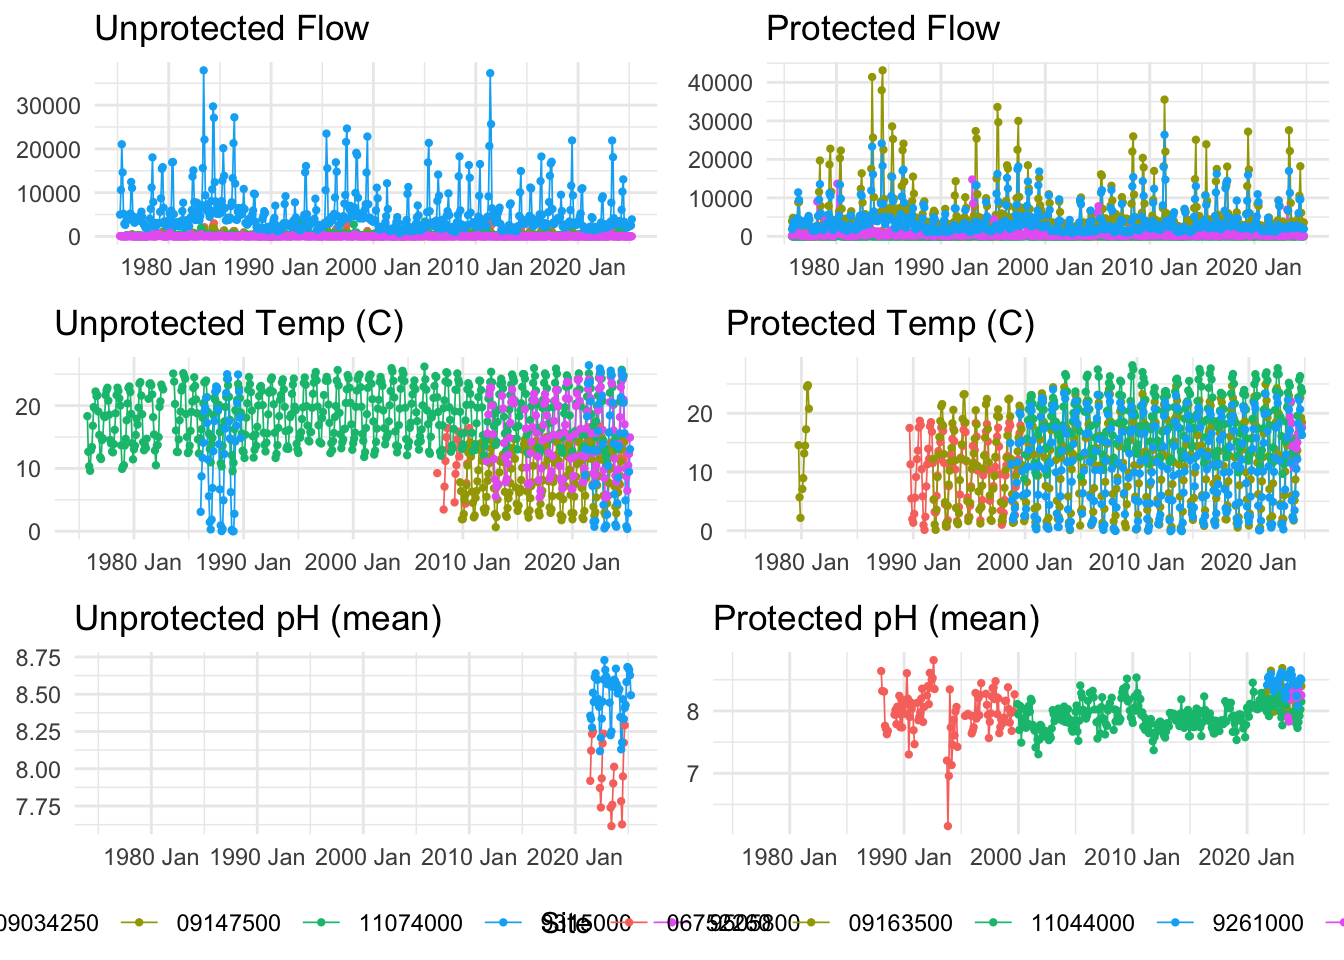

In [ ]:
# 1) bind & tag
unprotected_all <- bind_rows(
  COdata_unprotected1 %>% mutate(site_no = as.character(site_no)),
  COdata_unprotected2 %>% mutate(site_no = as.character(site_no)),
  CAdata_unprotected   %>% mutate(site_no = as.character(site_no)),
  AZdata_unprotected   %>% mutate(site_no = as.character(site_no)),
  UTdata_unprotected   %>% mutate(site_no = as.character(site_no))
) %>%
  mutate(protection = "Unprotected")

protected_all <- bind_rows(
  COdata_protected1 %>% mutate(site_no = as.character(site_no)),
  COdata_protected2 %>% mutate(site_no = as.character(site_no)),
  CAdata_protected  %>% mutate(site_no = as.character(site_no)),
  AZdata_protected  %>% mutate(site_no = as.character(site_no)),
  UTdata_protected  %>% mutate(site_no = as.character(site_no))
) %>%
  mutate(protection = "Protected")

# 2) factorize **after** sub‐setting (so you only get the levels you actually have)
unprotected_all <- unprotected_all %>% mutate(site_no = factor(site_no))
protected_all   <- protected_all   %>% mutate(site_no = factor(site_no))

# 3) helper
make_panel <- function(df, yvar, title) {
  ggplot(df, aes(x = Date, y = .data[[yvar]], colour = site_no)) +
    geom_line(size = 0.3,   na.rm = TRUE) +
    geom_point(size = 0.8,  na.rm = TRUE) +
    labs(title = title, x = NULL, y = NULL, colour = "Site") +
    theme_minimal()
}

# 4) build
p_flow_un <- make_panel(unprotected_all, "Flow",      "Unprotected Flow")

In [ ]:
# Looking at seasonal data
library(tsibble)
library(feasts)

Loading required package: fabletools